In [1]:
#  imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [2]:
# load data 
from keras.datasets import cifar10

cls_names = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

"""
X_train.shape: (50000, 3, 32, 32)
X_test.shape: (10000, 3, 32, 32)
y: 10 labels
"""
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape((y_train.shape[0]))
y_test = y_test.reshape((y_test.shape[0]))

Using TensorFlow backend.


In [3]:
# rechape data (..,...)
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [4]:
# new train reshape 
X_train.shape

(50000, 3072)

In [5]:
# DeepExtratrees
import argparse
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/cifar10.json")  
gc = GCForest(config)

In [6]:
# count of class
len(np.unique(y_train))

10

In [7]:
             # X_enc is the concatenated predict_proba result of DeepExtratrees

X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
     

[ 2018-07-27 20:38:21,045][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3072)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3072)],y_test.shape=(10000,)
[ 2018-07-27 20:38:21,108][cascade_classifier.fit_transform] group_dims=[3072]
[ 2018-07-27 20:38:21,109][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 20:38:21,110][cascade_classifier.fit_transform] group_ends=[3072]
[ 2018-07-27 20:38:21,110][cascade_classifier.fit_transform] X_train.shape=(50000, 3072),X_test.shape=(10000, 3072)
[ 2018-07-27 20:38:21,467][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3072), X_cur_test.shape=(10000, 3072)
[ 2018-07-27 20:38:38,403][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=46.14%
[ 2018-07-27 20:38:59,048][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=46.40%
[ 2018-07-27 20:39:15,759][kfold_wrapper.log_eval_metrics] Accuracy

In [8]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtratrees = {:.6f} %".format(acc * 100))

[ 2018-07-27 20:41:24,967][cascade_classifier.transform] X_groups_test.shape=[(10000, 3072)]
[ 2018-07-27 20:41:24,973][cascade_classifier.transform] group_dims=[3072]
[ 2018-07-27 20:41:24,975][cascade_classifier.transform] X_test.shape=(10000, 3072)
[ 2018-07-27 20:41:25,038][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(10000, 3072)


Test Accuracy of DeepExtratrees = 49.490000 %


In [9]:
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[577  30  48  15  28  13  27  27 170  65]
 [ 25 573   9  33  15  19  46  35  64 181]
 [100  48 342  71 142  60 127  49  30  31]
 [ 52  39  60 262  72 188 164  60  22  81]
 [ 52  18 126  46 423  44 156  81  28  26]
 [ 34  23  76 142  73 424  84  78  28  38]
 [ 12  26  67  46 101  52 623  22  11  40]
 [ 41  47  35  44 103  74  49 488  28  91]
 [ 78  78  11  22  18  33  14  23 652  71]
 [ 44 153  11  27  17  20  29  34  80 585]]


             precision    recall  f1-score   support

          0       0.57      0.58      0.57      1000
          1       0.55      0.57      0.56      1000
          2       0.44      0.34      0.38      1000
          3       0.37      0.26      0.31      1000
          4       0.43      0.42      0.42      1000
          5       0.46      0.42      0.44      1000
          6       0.47      0.62      0.54      1000
          7       0.54      0.49      0.51      1000
          8       0.59      0.65      0.62      1000
          9       0.48      0.58    

In [10]:
# Make data + estimator
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-27 20:41:29,015][cascade_classifier.transform] X_groups_test.shape=[(10000, 3072)]
[ 2018-07-27 20:41:29,020][cascade_classifier.transform] group_dims=[3072]
[ 2018-07-27 20:41:29,020][cascade_classifier.transform] X_test.shape=(10000, 3072)
[ 2018-07-27 20:41:29,081][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(10000, 3072)


In [11]:
X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-27 20:41:31,957][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3082)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3082)],y_test.shape=(10000,)
[ 2018-07-27 20:41:32,235][cascade_classifier.fit_transform] group_dims=[3082]
[ 2018-07-27 20:41:32,236][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 20:41:32,237][cascade_classifier.fit_transform] group_ends=[3082]
[ 2018-07-27 20:41:32,238][cascade_classifier.fit_transform] X_train.shape=(50000, 3082),X_test.shape=(10000, 3082)
[ 2018-07-27 20:41:32,517][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3082), X_cur_test.shape=(10000, 3082)
[ 2018-07-27 20:41:54,496][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=47.12%
[ 2018-07-27 20:42:11,919][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=46.96%
[ 2018-07-27 20:42:34,641][kfold_wrapper.log_eval_metrics] Accuracy

In [12]:
# predict  data + Es
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtraTrees = {:.6f} %".format(acc * 100))

[ 2018-07-27 20:44:39,282][cascade_classifier.transform] X_groups_test.shape=[(10000, 3082)]
[ 2018-07-27 20:44:39,331][cascade_classifier.transform] group_dims=[3082]
[ 2018-07-27 20:44:39,332][cascade_classifier.transform] X_test.shape=(10000, 3082)
[ 2018-07-27 20:44:39,380][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(10000, 3082)


Test Accuracy of DeepExtraTrees = 49.910000 %


In [13]:
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[576  31  49  14  26  18  28  25 168  65]
 [ 25 580  10  36  15  18  41  30  64 181]
 [ 97  45 347  72 136  61 125  60  28  29]
 [ 48  42  64 273  63 199 154  59  23  75]
 [ 54  15 136  45 413  43 157  89  24  24]
 [ 32  22  70 151  61 435  85  85  25  34]
 [  8  28  68  60  93  46 622  26  11  38]
 [ 40  42  32  44  94  79  51 498  28  92]
 [ 75  84  16  19  17  32  12  23 653  69]
 [ 39 160   8  31  14  17  33  31  73 594]]


             precision    recall  f1-score   support

          0       0.58      0.58      0.58      1000
          1       0.55      0.58      0.57      1000
          2       0.43      0.35      0.39      1000
          3       0.37      0.27      0.31      1000
          4       0.44      0.41      0.43      1000
          5       0.46      0.43      0.45      1000
          6       0.48      0.62      0.54      1000
          7       0.54      0.50      0.52      1000
          8       0.60      0.65      0.62      1000
          9       0.49      0.59    

In [14]:
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")


[ 2018-07-27 20:44:44,467][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3090)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3090)],y_test.shape=(10000,)
[ 2018-07-27 20:44:44,763][cascade_classifier.fit_transform] group_dims=[3090]
[ 2018-07-27 20:44:44,764][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 20:44:44,765][cascade_classifier.fit_transform] group_ends=[3090]
[ 2018-07-27 20:44:44,766][cascade_classifier.fit_transform] X_train.shape=(50000, 3090),X_test.shape=(10000, 3090)
[ 2018-07-27 20:44:45,053][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3090), X_cur_test.shape=(10000, 3090)
[ 2018-07-27 20:45:04,961][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=47.92%
[ 2018-07-27 20:45:24,872][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=48.22%
[ 2018-07-27 20:45:45,153][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 50.900000 %', 'Layer :', 0)
[[573  33  54  11  27  18  31  22 165  66]
 [ 22 588   8  38  11  23  38  31  64 177]
 [ 95  42 352  81 128  64 128  52  26  32]
 [ 46  38  59 319  66 180 146  47  23  76]
 [ 54  18 133  51 407  43 159  91  22  22]
 [ 25  22  72 140  59 450  96  81  25  30]
 [  9  24  61  61  97  48 628  23   7  42]
 [ 40  41  31  51  78  75  46 530  23  85]
 [ 77  80  10  22  19  33  14  19 646  80]
 [ 37 159   8  34  13  17  30  30  75 597]]


             precision    recall  f1-score   support

          0       0.59      0.57      0.58      1000
          1       0.56      0.59      0.58      1000
          2       0.45      0.35      0.39      1000
          3       0.39      0.32      0.35      1000
          4       0.45      0.41      0.43      1000
          5       0.47      0.45      0.46      1000
          6       0.48      0.63      0.54      1000
          7       0.57      0.53      0.55      1000
          8       0.60  

[ 2018-07-27 20:48:05,053][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3098)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3098)],y_test.shape=(10000,)
[ 2018-07-27 20:48:05,329][cascade_classifier.fit_transform] group_dims=[3098]
[ 2018-07-27 20:48:05,330][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 20:48:05,331][cascade_classifier.fit_transform] group_ends=[3098]
[ 2018-07-27 20:48:05,332][cascade_classifier.fit_transform] X_train.shape=(50000, 3098),X_test.shape=(10000, 3098)
[ 2018-07-27 20:48:05,611][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3098), X_cur_test.shape=(10000, 3098)
[ 2018-07-27 20:48:22,730][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=48.12%
[ 2018-07-27 20:48:40,166][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=48.42%
[ 2018-07-27 20:48:58,788][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 51.300000 %', 'Layer :', 1)
[[582  31  52  16  24  23  26  21 159  66]
 [ 23 603   5  32  10  28  37  30  59 173]
 [ 89  43 353  91 127  67 122  54  27  27]
 [ 46  42  56 329  58 191 145  44  19  70]
 [ 53  19 139  44 405  51 159  90  23  17]
 [ 25  23  59 160  57 445  92  88  22  29]
 [ 10  27  52  64  83  50 647  19   9  39]
 [ 39  42  33  50  73  75  46 532  23  87]
 [ 75  84  15  21  18  30  13  24 641  79]
 [ 41 173  11  32  10  14  26  34  66 593]]


             precision    recall  f1-score   support

          0       0.59      0.58      0.59      1000
          1       0.55      0.60      0.58      1000
          2       0.46      0.35      0.40      1000
          3       0.39      0.33      0.36      1000
          4       0.47      0.41      0.43      1000
          5       0.46      0.45      0.45      1000
          6       0.49      0.65      0.56      1000
          7       0.57      0.53      0.55      1000
          8       0.61  

[ 2018-07-27 20:51:17,527][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3106)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3106)],y_test.shape=(10000,)
[ 2018-07-27 20:51:17,804][cascade_classifier.fit_transform] group_dims=[3106]
[ 2018-07-27 20:51:17,805][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 20:51:17,806][cascade_classifier.fit_transform] group_ends=[3106]
[ 2018-07-27 20:51:17,807][cascade_classifier.fit_transform] X_train.shape=(50000, 3106),X_test.shape=(10000, 3106)
[ 2018-07-27 20:51:18,091][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3106), X_cur_test.shape=(10000, 3106)
[ 2018-07-27 20:51:36,777][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=48.64%
[ 2018-07-27 20:51:57,279][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=48.02%
[ 2018-07-27 20:52:17,619][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 51.490000 %', 'Layer :', 2)
[[586  33  49  19  31  24  23  19 149  67]
 [ 21 604   6  38  12  20  35  26  61 177]
 [ 87  39 351  95 128  67 123  55  29  26]
 [ 43  35  50 344  54 184 148  49  21  72]
 [ 49  16 129  56 404  45 156  99  22  24]
 [ 24  22  69 169  52 447  82  85  21  29]
 [  8  26  58  70  81  45 647  22   6  37]
 [ 37  44  25  57  76  77  38 539  23  84]
 [ 77  84  16  22  15  31  12  21 639  83]
 [ 40 174   7  38   9  18  28  32  66 588]]


             precision    recall  f1-score   support

          0       0.60      0.59      0.59      1000
          1       0.56      0.60      0.58      1000
          2       0.46      0.35      0.40      1000
          3       0.38      0.34      0.36      1000
          4       0.47      0.40      0.43      1000
          5       0.47      0.45      0.46      1000
          6       0.50      0.65      0.56      1000
          7       0.57      0.54      0.55      1000
          8       0.62  

[ 2018-07-27 20:54:32,387][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3114)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3114)],y_test.shape=(10000,)
[ 2018-07-27 20:54:32,513][cascade_classifier.fit_transform] group_dims=[3114]
[ 2018-07-27 20:54:32,514][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 20:54:32,515][cascade_classifier.fit_transform] group_ends=[3114]
[ 2018-07-27 20:54:32,515][cascade_classifier.fit_transform] X_train.shape=(50000, 3114),X_test.shape=(10000, 3114)
[ 2018-07-27 20:54:32,793][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3114), X_cur_test.shape=(10000, 3114)
[ 2018-07-27 20:54:51,778][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=49.18%
[ 2018-07-27 20:55:09,494][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=48.94%
[ 2018-07-27 20:55:27,259][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 51.830000 %', 'Layer :', 3)
[[584  29  55  18  24  26  27  22 148  67]
 [ 22 620   7  37  10  18  34  27  55 170]
 [ 86  37 361  93 115  76 127  53  23  29]
 [ 43  43  56 345  48 198 143  41  19  64]
 [ 50  17 126  50 402  55 160  99  20  21]
 [ 19  21  63 170  60 461  84  75  20  27]
 [  8  26  57  74  75  45 653  21   7  34]
 [ 36  41  33  58  73  78  42 533  20  86]
 [ 76  85  14  20  17  33  13  20 636  86]
 [ 40 170   9  36   9  15  25  38  70 588]]


             precision    recall  f1-score   support

          0       0.61      0.58      0.59      1000
          1       0.57      0.62      0.59      1000
          2       0.46      0.36      0.41      1000
          3       0.38      0.34      0.36      1000
          4       0.48      0.40      0.44      1000
          5       0.46      0.46      0.46      1000
          6       0.50      0.65      0.57      1000
          7       0.57      0.53      0.55      1000
          8       0.62  

[ 2018-07-27 20:57:39,653][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3122)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3122)],y_test.shape=(10000,)
[ 2018-07-27 20:57:39,902][cascade_classifier.fit_transform] group_dims=[3122]
[ 2018-07-27 20:57:39,903][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 20:57:39,904][cascade_classifier.fit_transform] group_ends=[3122]
[ 2018-07-27 20:57:39,904][cascade_classifier.fit_transform] X_train.shape=(50000, 3122),X_test.shape=(10000, 3122)
[ 2018-07-27 20:57:40,165][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3122), X_cur_test.shape=(10000, 3122)
[ 2018-07-27 20:58:00,714][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=49.34%
[ 2018-07-27 20:58:19,847][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=48.42%
[ 2018-07-27 20:58:38,847][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 52.230000 %', 'Layer :', 4)
[[591  30  59  17  21  21  27  23 146  65]
 [ 20 615   6  38  10  23  32  27  55 174]
 [ 82  36 364 100 115  71 123  55  26  28]
 [ 39  34  56 363  45 191 142  45  18  67]
 [ 49  15 124  62 396  53 158 100  22  21]
 [ 19  15  56 180  56 464  84  75  21  30]
 [  7  25  49  84  79  44 649  20   6  37]
 [ 34  42  28  62  68  80  38 545  21  82]
 [ 79  82  15  24  16  31  13  20 638  82]
 [ 36 166   8  40   8  14  26  38  66 598]]


             precision    recall  f1-score   support

          0       0.62      0.59      0.60      1000
          1       0.58      0.61      0.60      1000
          2       0.48      0.36      0.41      1000
          3       0.37      0.36      0.37      1000
          4       0.49      0.40      0.44      1000
          5       0.47      0.46      0.47      1000
          6       0.50      0.65      0.57      1000
          7       0.57      0.55      0.56      1000
          8       0.63  

[ 2018-07-27 21:01:03,920][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3130)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3130)],y_test.shape=(10000,)
[ 2018-07-27 21:01:04,168][cascade_classifier.fit_transform] group_dims=[3130]
[ 2018-07-27 21:01:04,169][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:01:04,170][cascade_classifier.fit_transform] group_ends=[3130]
[ 2018-07-27 21:01:04,171][cascade_classifier.fit_transform] X_train.shape=(50000, 3130),X_test.shape=(10000, 3130)
[ 2018-07-27 21:01:04,429][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3130), X_cur_test.shape=(10000, 3130)
[ 2018-07-27 21:01:22,449][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=49.44%
[ 2018-07-27 21:01:40,492][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=48.80%
[ 2018-07-27 21:02:00,078][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 52.510000 %', 'Layer :', 5)
[[590  27  56  16  25  26  25  22 146  67]
 [ 21 616   9  35   8  24  33  29  51 174]
 [ 81  33 370 102 108  75 123  59  21  28]
 [ 40  31  49 369  50 197 137  43  18  66]
 [ 49  15 133  56 390  58 157 100  21  21]
 [ 21  20  64 177  51 460  83  79  19  26]
 [  6  24  51  79  72  44 668  14   6  36]
 [ 32  34  28  58  61  79  43 570  19  76]
 [ 84  81  11  22  18  34  14  22 634  80]
 [ 38 176   6  35  11  21  23  38  68 584]]


             precision    recall  f1-score   support

          0       0.61      0.59      0.60      1000
          1       0.58      0.62      0.60      1000
          2       0.48      0.37      0.42      1000
          3       0.39      0.37      0.38      1000
          4       0.49      0.39      0.43      1000
          5       0.45      0.46      0.46      1000
          6       0.51      0.67      0.58      1000
          7       0.58      0.57      0.58      1000
          8       0.63  

[ 2018-07-27 21:04:20,512][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3138)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3138)],y_test.shape=(10000,)
[ 2018-07-27 21:04:20,609][cascade_classifier.fit_transform] group_dims=[3138]
[ 2018-07-27 21:04:20,610][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:04:20,611][cascade_classifier.fit_transform] group_ends=[3138]
[ 2018-07-27 21:04:20,612][cascade_classifier.fit_transform] X_train.shape=(50000, 3138),X_test.shape=(10000, 3138)
[ 2018-07-27 21:04:20,865][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3138), X_cur_test.shape=(10000, 3138)
[ 2018-07-27 21:04:39,009][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=49.96%
[ 2018-07-27 21:04:58,954][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=49.36%
[ 2018-07-27 21:05:16,815][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 52.640000 %', 'Layer :', 6)
[[590  29  55  18  23  29  24  27 140  65]
 [ 17 625   5  41   8  22  30  27  54 171]
 [ 82  36 358 110 116  71 119  60  22  26]
 [ 34  33  51 391  41 196 133  37  18  66]
 [ 48  14 131  63 389  50 160 102  24  19]
 [ 18  18  58 177  57 472  80  75  19  26]
 [  5  24  47  81  69  50 667  19   7  31]
 [ 32  34  27  66  59  82  41 566  18  75]
 [ 81  85  17  23  11  35  14  20 627  87]
 [ 37 175   7  41   5  20  28  37  71 579]]


             precision    recall  f1-score   support

          0       0.62      0.59      0.61      1000
          1       0.58      0.62      0.60      1000
          2       0.47      0.36      0.41      1000
          3       0.39      0.39      0.39      1000
          4       0.50      0.39      0.44      1000
          5       0.46      0.47      0.47      1000
          6       0.51      0.67      0.58      1000
          7       0.58      0.57      0.57      1000
          8       0.63  

[ 2018-07-27 21:07:32,268][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3146)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3146)],y_test.shape=(10000,)
[ 2018-07-27 21:07:32,516][cascade_classifier.fit_transform] group_dims=[3146]
[ 2018-07-27 21:07:32,517][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:07:32,518][cascade_classifier.fit_transform] group_ends=[3146]
[ 2018-07-27 21:07:32,520][cascade_classifier.fit_transform] X_train.shape=(50000, 3146),X_test.shape=(10000, 3146)
[ 2018-07-27 21:07:32,769][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3146), X_cur_test.shape=(10000, 3146)
[ 2018-07-27 21:07:53,474][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=49.20%
[ 2018-07-27 21:08:12,844][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=49.54%
[ 2018-07-27 21:08:32,232][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 52.620000 %', 'Layer :', 7)
[[590  29  57  19  24  30  25  25 142  59]
 [ 18 615   5  46   6  22  32  25  53 178]
 [ 79  33 367 105 113  77 119  57  23  27]
 [ 33  31  51 382  38 204 136  38  19  68]
 [ 51  14 128  69 380  53 164 101  17  23]
 [ 16  16  62 184  49 480  73  73  21  26]
 [  5  23  43  86  71  46 671  17   6  32]
 [ 28  30  27  73  62  81  38 565  17  79]
 [ 83  85  14  24  14  35  12  22 623  88]
 [ 37 167   8  46  10  18  21  37  67 589]]


             precision    recall  f1-score   support

          0       0.63      0.59      0.61      1000
          1       0.59      0.61      0.60      1000
          2       0.48      0.37      0.42      1000
          3       0.37      0.38      0.38      1000
          4       0.50      0.38      0.43      1000
          5       0.46      0.48      0.47      1000
          6       0.52      0.67      0.59      1000
          7       0.59      0.56      0.58      1000
          8       0.63  

[ 2018-07-27 21:10:58,127][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3154)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3154)],y_test.shape=(10000,)
[ 2018-07-27 21:10:58,378][cascade_classifier.fit_transform] group_dims=[3154]
[ 2018-07-27 21:10:58,379][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:10:58,380][cascade_classifier.fit_transform] group_ends=[3154]
[ 2018-07-27 21:10:58,381][cascade_classifier.fit_transform] X_train.shape=(50000, 3154),X_test.shape=(10000, 3154)
[ 2018-07-27 21:10:58,641][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3154), X_cur_test.shape=(10000, 3154)
[ 2018-07-27 21:11:16,666][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=49.44%
[ 2018-07-27 21:11:34,814][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=49.36%
[ 2018-07-27 21:11:57,459][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 52.840000 %', 'Layer :', 8)
[[593  29  55  21  25  29  22  23 139  64]
 [ 19 619   6  48   9  17  29  27  54 172]
 [ 80  35 370 111 113  71 116  62  18  24]
 [ 32  29  58 398  41 192 127  41  17  65]
 [ 48  14 128  70 390  53 157  99  19  22]
 [ 17  16  58 200  48 464  75  78  20  24]
 [  5  22  48  90  71  42 665  19   7  31]
 [ 28  32  31  68  57  79  39 578  12  76]
 [ 85  81  14  27  12  31  14  22 624  90]
 [ 36 170   8  47   8  17  24  39  68 583]]


             precision    recall  f1-score   support

          0       0.63      0.59      0.61      1000
          1       0.59      0.62      0.60      1000
          2       0.48      0.37      0.42      1000
          3       0.37      0.40      0.38      1000
          4       0.50      0.39      0.44      1000
          5       0.47      0.46      0.47      1000
          6       0.52      0.67      0.59      1000
          7       0.59      0.58      0.58      1000
          8       0.64  

[ 2018-07-27 21:14:11,218][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3162)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3162)],y_test.shape=(10000,)
[ 2018-07-27 21:14:11,468][cascade_classifier.fit_transform] group_dims=[3162]
[ 2018-07-27 21:14:11,469][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:14:11,470][cascade_classifier.fit_transform] group_ends=[3162]
[ 2018-07-27 21:14:11,471][cascade_classifier.fit_transform] X_train.shape=(50000, 3162),X_test.shape=(10000, 3162)
[ 2018-07-27 21:14:11,726][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3162), X_cur_test.shape=(10000, 3162)
[ 2018-07-27 21:14:30,901][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=50.52%
[ 2018-07-27 21:14:54,653][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.14%
[ 2018-07-27 21:15:14,733][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 53.000000 %', 'Layer :', 9)
[[590  26  51  25  26  28  21  27 143  63]
 [ 20 618   7  47   6  19  27  27  52 177]
 [ 79  35 371 110 119  75 112  56  18  25]
 [ 32  27  47 414  41 189 127  40  18  65]
 [ 54  13 131  72 394  46 152 101  15  22]
 [ 17  15  54 199  46 467  81  81  17  23]
 [  5  22  54  90  66  48 662  18   5  30]
 [ 27  32  29  74  55  80  41 577  15  70]
 [ 80  84  15  32  13  29  11  21 628  87]
 [ 40 170   6  44   8  21  24  41  67 579]]


             precision    recall  f1-score   support

          0       0.62      0.59      0.61      1000
          1       0.59      0.62      0.61      1000
          2       0.48      0.37      0.42      1000
          3       0.37      0.41      0.39      1000
          4       0.51      0.39      0.44      1000
          5       0.47      0.47      0.47      1000
          6       0.53      0.66      0.59      1000
          7       0.58      0.58      0.58      1000
          8       0.64  

[ 2018-07-27 21:17:38,974][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3170)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3170)],y_test.shape=(10000,)
[ 2018-07-27 21:17:39,225][cascade_classifier.fit_transform] group_dims=[3170]
[ 2018-07-27 21:17:39,226][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:17:39,227][cascade_classifier.fit_transform] group_ends=[3170]
[ 2018-07-27 21:17:39,228][cascade_classifier.fit_transform] X_train.shape=(50000, 3170),X_test.shape=(10000, 3170)
[ 2018-07-27 21:17:39,481][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3170), X_cur_test.shape=(10000, 3170)
[ 2018-07-27 21:18:01,832][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=49.64%
[ 2018-07-27 21:18:20,128][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=49.82%
[ 2018-07-27 21:18:38,303][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 53.010000 %', 'Layer :', 10)
[[599  26  56  24  26  30  21  21 137  60]
 [ 19 619   7  51   7  21  27  26  52 171]
 [ 80  36 366 115 116  79 105  59  16  28]
 [ 29  26  50 418  35 195 126  38  18  65]
 [ 50  12 138  66 387  59 151  96  19  22]
 [ 14  14  59 202  46 472  80  72  18  23]
 [  5  22  45  87  76  49 664  14   7  31]
 [ 29  29  29  74  60  85  37 580  13  64]
 [ 84  84  12  23  18  36  14  21 620  88]
 [ 39 176   8  50   7  20  22  38  64 576]]


             precision    recall  f1-score   support

          0       0.63      0.60      0.61      1000
          1       0.59      0.62      0.61      1000
          2       0.48      0.37      0.41      1000
          3       0.38      0.42      0.40      1000
          4       0.50      0.39      0.44      1000
          5       0.45      0.47      0.46      1000
          6       0.53      0.66      0.59      1000
          7       0.60      0.58      0.59      1000
          8       0.64 

[ 2018-07-27 21:20:56,923][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3178)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3178)],y_test.shape=(10000,)
[ 2018-07-27 21:20:57,020][cascade_classifier.fit_transform] group_dims=[3178]
[ 2018-07-27 21:20:57,021][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:20:57,022][cascade_classifier.fit_transform] group_ends=[3178]
[ 2018-07-27 21:20:57,022][cascade_classifier.fit_transform] X_train.shape=(50000, 3178),X_test.shape=(10000, 3178)
[ 2018-07-27 21:20:57,276][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3178), X_cur_test.shape=(10000, 3178)
[ 2018-07-27 21:21:15,575][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=50.50%
[ 2018-07-27 21:21:34,456][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.00%
[ 2018-07-27 21:21:54,917][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 53.210000 %', 'Layer :', 11)
[[591  26  54  26  25  27  23  27 145  56]
 [ 20 623   7  49   7  20  26  27  53 168]
 [ 78  32 375 119 110  76 111  58  16  25]
 [ 29  26  49 419  41 186 126  44  17  63]
 [ 51  14 128  74 401  48 152  94  16  22]
 [ 16  14  58 209  46 470  74  73  18  22]
 [  6  23  46  98  70  45 662  16   7  27]
 [ 28  31  28  73  60  86  35 583  15  61]
 [ 87  80  18  31  14  32  13  20 616  89]
 [ 37 169   8  48   7  21  23  38  68 581]]


             precision    recall  f1-score   support

          0       0.63      0.59      0.61      1000
          1       0.60      0.62      0.61      1000
          2       0.49      0.38      0.42      1000
          3       0.37      0.42      0.39      1000
          4       0.51      0.40      0.45      1000
          5       0.46      0.47      0.47      1000
          6       0.53      0.66      0.59      1000
          7       0.59      0.58      0.59      1000
          8       0.63 

[ 2018-07-27 21:24:12,089][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3186)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3186)],y_test.shape=(10000,)
[ 2018-07-27 21:24:12,347][cascade_classifier.fit_transform] group_dims=[3186]
[ 2018-07-27 21:24:12,348][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:24:12,348][cascade_classifier.fit_transform] group_ends=[3186]
[ 2018-07-27 21:24:12,349][cascade_classifier.fit_transform] X_train.shape=(50000, 3186),X_test.shape=(10000, 3186)
[ 2018-07-27 21:24:12,610][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3186), X_cur_test.shape=(10000, 3186)
[ 2018-07-27 21:24:30,689][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=50.90%
[ 2018-07-27 21:24:49,639][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.22%
[ 2018-07-27 21:25:09,319][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 53.480000 %', 'Layer :', 12)
[[598  26  56  22  25  29  21  25 135  63]
 [ 20 626   4  51   9  18  26  27  51 168]
 [ 76  33 364 123 120  73 107  61  20  23]
 [ 31  27  47 424  45 189 119  44  18  56]
 [ 50  14 128  77 393  51 153  97  17  20]
 [ 16  12  57 202  45 476  76  75  19  22]
 [  4  20  48  88  63  48 675  21   7  26]
 [ 31  29  24  74  57  76  39 598  12  60]
 [ 91  80  17  29  13  30  14  21 615  90]
 [ 34 172   9  54   7  19  21  40  65 579]]


             precision    recall  f1-score   support

          0       0.63      0.60      0.61      1000
          1       0.60      0.63      0.61      1000
          2       0.48      0.36      0.42      1000
          3       0.37      0.42      0.40      1000
          4       0.51      0.39      0.44      1000
          5       0.47      0.48      0.47      1000
          6       0.54      0.68      0.60      1000
          7       0.59      0.60      0.60      1000
          8       0.64 

[ 2018-07-27 21:27:43,760][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3194)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3194)],y_test.shape=(10000,)
[ 2018-07-27 21:27:44,017][cascade_classifier.fit_transform] group_dims=[3194]
[ 2018-07-27 21:27:44,018][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:27:44,019][cascade_classifier.fit_transform] group_ends=[3194]
[ 2018-07-27 21:27:44,020][cascade_classifier.fit_transform] X_train.shape=(50000, 3194),X_test.shape=(10000, 3194)
[ 2018-07-27 21:27:44,278][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3194), X_cur_test.shape=(10000, 3194)
[ 2018-07-27 21:28:05,491][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=51.08%
[ 2018-07-27 21:28:25,269][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.40%
[ 2018-07-27 21:28:45,213][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 53.440000 %', 'Layer :', 13)
[[600  25  53  23  26  27  21  27 140  58]
 [ 18 626   6  51   7  20  26  28  51 167]
 [ 77  33 373 113 111  77 111  62  18  25]
 [ 29  26  47 408  41 204 127  41  18  59]
 [ 51  12 125  78 400  50 151 100  15  18]
 [ 13  13  63 201  42 478  75  74  20  21]
 [  5  21  43  91  75  42 671  19   6  27]
 [ 26  29  28  77  59  78  33 594  14  62]
 [ 87  84  15  30  14  31  14  21 616  88]
 [ 37 172   8  54   8  17  21  41  64 578]]


             precision    recall  f1-score   support

          0       0.64      0.60      0.62      1000
          1       0.60      0.63      0.61      1000
          2       0.49      0.37      0.42      1000
          3       0.36      0.41      0.38      1000
          4       0.51      0.40      0.45      1000
          5       0.47      0.48      0.47      1000
          6       0.54      0.67      0.60      1000
          7       0.59      0.59      0.59      1000
          8       0.64 

[ 2018-07-27 21:31:22,655][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3202)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3202)],y_test.shape=(10000,)
[ 2018-07-27 21:31:22,754][cascade_classifier.fit_transform] group_dims=[3202]
[ 2018-07-27 21:31:22,755][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:31:22,755][cascade_classifier.fit_transform] group_ends=[3202]
[ 2018-07-27 21:31:22,756][cascade_classifier.fit_transform] X_train.shape=(50000, 3202),X_test.shape=(10000, 3202)
[ 2018-07-27 21:31:23,017][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3202), X_cur_test.shape=(10000, 3202)
[ 2018-07-27 21:31:44,677][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=50.72%
[ 2018-07-27 21:32:06,127][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.38%
[ 2018-07-27 21:32:27,471][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 53.540000 %', 'Layer :', 14)
[[603  24  56  20  24  32  21  26 136  58]
 [ 17 626   6  59   8  11  24  25  51 173]
 [ 75  32 376 119 116  72 111  57  20  22]
 [ 28  25  46 417  40 199 126  43  19  57]
 [ 47  14 134  80 395  49 149  98  17  17]
 [ 12  16  59 213  43 472  73  74  18  20]
 [  4  22  51  93  66  41 673  18   6  26]
 [ 26  30  30  74  56  80  41 590  14  59]
 [ 88  83  15  29  17  31  13  21 618  85]
 [ 33 168   8  50   7  23  21  39  67 584]]


             precision    recall  f1-score   support

          0       0.65      0.60      0.62      1000
          1       0.60      0.63      0.61      1000
          2       0.48      0.38      0.42      1000
          3       0.36      0.42      0.39      1000
          4       0.51      0.40      0.45      1000
          5       0.47      0.47      0.47      1000
          6       0.54      0.67      0.60      1000
          7       0.60      0.59      0.59      1000
          8       0.64 

[ 2018-07-27 21:35:02,386][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3210)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3210)],y_test.shape=(10000,)
[ 2018-07-27 21:35:02,483][cascade_classifier.fit_transform] group_dims=[3210]
[ 2018-07-27 21:35:02,484][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:35:02,485][cascade_classifier.fit_transform] group_ends=[3210]
[ 2018-07-27 21:35:02,485][cascade_classifier.fit_transform] X_train.shape=(50000, 3210),X_test.shape=(10000, 3210)
[ 2018-07-27 21:35:02,588][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3210), X_cur_test.shape=(10000, 3210)
[ 2018-07-27 21:35:21,500][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=51.02%
[ 2018-07-27 21:35:45,205][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.64%
[ 2018-07-27 21:36:07,487][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 53.200000 %', 'Layer :', 15)
[[600  25  50  26  23  30  22  28 135  61]
 [ 19 626   6  55   7  15  24  26  49 173]
 [ 69  32 381 124 117  72 105  59  16  25]
 [ 27  26  46 419  42 193 126  42  18  61]
 [ 49  12 137  79 391  53 146  99  14  20]
 [ 14  14  55 216  45 467  73  75  19  22]
 [  4  21  48 106  68  35 666  19   6  27]
 [ 23  32  28  80  57  80  36 592  13  59]
 [ 89  81  18  30  13  32  14  22 606  95]
 [ 37 172   6  57   6  19  24  41  66 572]]


             precision    recall  f1-score   support

          0       0.64      0.60      0.62      1000
          1       0.60      0.63      0.61      1000
          2       0.49      0.38      0.43      1000
          3       0.35      0.42      0.38      1000
          4       0.51      0.39      0.44      1000
          5       0.47      0.47      0.47      1000
          6       0.54      0.67      0.60      1000
          7       0.59      0.59      0.59      1000
          8       0.64 

[ 2018-07-27 21:38:34,772][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3218)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3218)],y_test.shape=(10000,)
[ 2018-07-27 21:38:34,871][cascade_classifier.fit_transform] group_dims=[3218]
[ 2018-07-27 21:38:34,872][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:38:34,873][cascade_classifier.fit_transform] group_ends=[3218]
[ 2018-07-27 21:38:34,874][cascade_classifier.fit_transform] X_train.shape=(50000, 3218),X_test.shape=(10000, 3218)
[ 2018-07-27 21:38:35,137][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3218), X_cur_test.shape=(10000, 3218)
[ 2018-07-27 21:38:58,240][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=50.74%
[ 2018-07-27 21:39:17,037][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.86%
[ 2018-07-27 21:39:35,709][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 53.510000 %', 'Layer :', 16)
[[601  24  56  19  27  33  19  32 131  58]
 [ 21 636   7  52   8  16  23  25  48 164]
 [ 71  29 378 118 118  81 103  59  16  27]
 [ 30  29  46 423  43 197 119  42  15  56]
 [ 51  13 133  81 389  55 148  99  16  15]
 [ 15  12  58 211  46 477  71  71  19  20]
 [  4  20  46  95  71  44 669  20   6  25]
 [ 28  32  26  77  59  81  37 593  11  56]
 [ 96  82  16  35  14  28  13  21 612  83]
 [ 33 179   5  52   9  18  22  43  66 573]]


             precision    recall  f1-score   support

          0       0.63      0.60      0.62      1000
          1       0.60      0.64      0.62      1000
          2       0.49      0.38      0.43      1000
          3       0.36      0.42      0.39      1000
          4       0.50      0.39      0.44      1000
          5       0.46      0.48      0.47      1000
          6       0.55      0.67      0.60      1000
          7       0.59      0.59      0.59      1000
          8       0.65 

[ 2018-07-27 21:42:06,471][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3226)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3226)],y_test.shape=(10000,)
[ 2018-07-27 21:42:06,571][cascade_classifier.fit_transform] group_dims=[3226]
[ 2018-07-27 21:42:06,572][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:42:06,572][cascade_classifier.fit_transform] group_ends=[3226]
[ 2018-07-27 21:42:06,573][cascade_classifier.fit_transform] X_train.shape=(50000, 3226),X_test.shape=(10000, 3226)
[ 2018-07-27 21:42:06,830][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3226), X_cur_test.shape=(10000, 3226)
[ 2018-07-27 21:42:27,382][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=51.02%
[ 2018-07-27 21:42:49,462][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.38%
[ 2018-07-27 21:43:10,910][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 53.700000 %', 'Layer :', 17)
[[607  24  51  25  27  27  21  30 134  54]
 [ 23 633   7  57   7  17  22  26  46 162]
 [ 69  30 379 113 117  83 104  61  20  24]
 [ 27  27  50 431  39 186 125  41  16  58]
 [ 52  13 128  86 398  47 147  96  16  17]
 [ 14  11  61 203  48 472  74  73  20  24]
 [  4  20  47  92  68  44 671  23   6  25]
 [ 27  30  26  72  63  80  35 597  11  59]
 [ 87  82  21  31  12  32  14  23 609  89]
 [ 37 172  11  52   6  18  19  47  65 573]]


             precision    recall  f1-score   support

          0       0.64      0.61      0.62      1000
          1       0.61      0.63      0.62      1000
          2       0.49      0.38      0.43      1000
          3       0.37      0.43      0.40      1000
          4       0.51      0.40      0.45      1000
          5       0.47      0.47      0.47      1000
          6       0.54      0.67      0.60      1000
          7       0.59      0.60      0.59      1000
          8       0.65 

[ 2018-07-27 21:45:29,694][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3234)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3234)],y_test.shape=(10000,)
[ 2018-07-27 21:45:29,790][cascade_classifier.fit_transform] group_dims=[3234]
[ 2018-07-27 21:45:29,791][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:45:29,792][cascade_classifier.fit_transform] group_ends=[3234]
[ 2018-07-27 21:45:29,792][cascade_classifier.fit_transform] X_train.shape=(50000, 3234),X_test.shape=(10000, 3234)
[ 2018-07-27 21:45:29,890][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3234), X_cur_test.shape=(10000, 3234)
[ 2018-07-27 21:45:53,637][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=51.02%
[ 2018-07-27 21:46:14,464][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.50%
[ 2018-07-27 21:46:33,808][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 53.690000 %', 'Layer :', 18)
[[608  24  50  24  28  29  21  28 134  54]
 [ 20 629   6  52   8  19  23  26  49 168]
 [ 68  31 379 114 115  81 108  61  17  26]
 [ 30  22  52 428  37 190 122  41  16  62]
 [ 49  13 123  83 409  53 143  94  16  17]
 [ 14  13  60 218  44 461  74  74  20  22]
 [  4  18  50  93  68  42 674  21   6  24]
 [ 26  28  29  71  53  83  39 603  12  56]
 [ 90  80  17  29  15  31  14  22 607  95]
 [ 34 175   8  52   6  21  21  45  67 571]]


             precision    recall  f1-score   support

          0       0.64      0.61      0.63      1000
          1       0.61      0.63      0.62      1000
          2       0.49      0.38      0.43      1000
          3       0.37      0.43      0.40      1000
          4       0.52      0.41      0.46      1000
          5       0.46      0.46      0.46      1000
          6       0.54      0.67      0.60      1000
          7       0.59      0.60      0.60      1000
          8       0.64 

[ 2018-07-27 21:49:04,465][cascade_classifier.fit_transform] X_groups_train.shape=[(50000, 3242)],y_train.shape=(50000,),X_groups_test.shape=[(10000, 3242)],y_test.shape=(10000,)
[ 2018-07-27 21:49:04,562][cascade_classifier.fit_transform] group_dims=[3242]
[ 2018-07-27 21:49:04,564][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:49:04,564][cascade_classifier.fit_transform] group_ends=[3242]
[ 2018-07-27 21:49:04,565][cascade_classifier.fit_transform] X_train.shape=(50000, 3242),X_test.shape=(10000, 3242)
[ 2018-07-27 21:49:04,825][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(50000, 3242), X_cur_test.shape=(10000, 3242)
[ 2018-07-27 21:49:23,206][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=51.78%
[ 2018-07-27 21:49:41,622][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.80%
[ 2018-07-27 21:50:01,763][kfold_wrapper.log_eval_metrics] Accuracy

('Test Accuracy of DeepExtratTrees = 53.850000 %', 'Layer :', 19)
[[605  24  54  27  25  26  22  30 131  56]
 [ 19 634   6  57   8  14  21  26  46 169]
 [ 68  32 377 117 119  77 105  61  20  24]
 [ 25  26  53 435  37 187 123  42  15  57]
 [ 50  13 133  85 405  46 142  94  13  19]
 [ 15  13  56 216  47 469  70  72  18  24]
 [  4  21  48  98  64  38 676  22   6  23]
 [ 25  27  25  80  59  79  33 604  13  55]
 [ 90  80  17  30  15  33  14  22 606  93]
 [ 38 168   7  52  10  22  20  45  64 574]]


             precision    recall  f1-score   support

          0       0.64      0.60      0.62      1000
          1       0.61      0.63      0.62      1000
          2       0.49      0.38      0.42      1000
          3       0.36      0.43      0.40      1000
          4       0.51      0.41      0.45      1000
          5       0.47      0.47      0.47      1000
          6       0.55      0.68      0.61      1000
          7       0.59      0.60      0.60      1000
          8       0.65 

('Opt_layer_num =', 19, ' Accuracy =', 53.85, 'Time =', 4014.0800000000004)


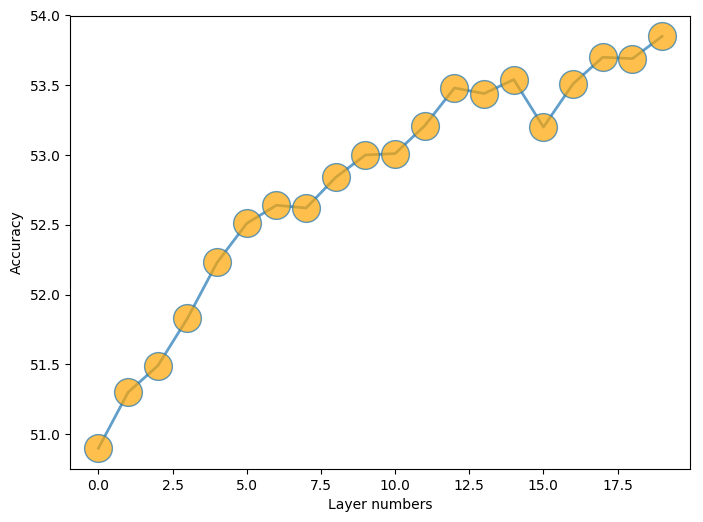

In [15]:
print ("Opt_layer_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Layer numbers')
plt.show()

In [16]:
Accuracy

[50.9,
 51.3,
 51.49,
 51.83,
 52.23,
 52.51,
 52.64,
 52.62,
 52.84,
 53.0,
 53.01,
 53.21,
 53.48,
 53.44,
 53.54,
 53.2,
 53.51,
 53.7,
 53.69,
 53.85]